### Harvard GSD  J-Term 2121 
### Introduction to Data Science for Building Simulation
***
Instructor: Jung Min Han, jhan2@gsd.harvard.edu <br>
Date/Time: Jan 11-15/ 9:00 - 11:00 a.m. <br>
***

In [2]:
# import library
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

##  Natural ventilation cooling potential

In [6]:
def getPandasFromFile(path, fileName, theSkipRow):
    path = os.path.join(path , fileName)
    return pd.read_csv(path, skiprows= theSkipRow , header=None)
def SavePandasToCSV(d, path):
    d.to_csv(path)
    return "done!!"
def getPandasFromFile_my(path, fileName):
    path = os.path.join(path , fileName)
    return path 

In [7]:
d = getPandasFromFile("",'USA_MA_Boston-Logan.Intl.AP.725090_TMY3.epw', 8)
theDf =d.rename(index=str, columns={0:"year", 1: "Month", 2: "Day", 3:"Hour",4:"Minute",6:"DB_temp",
                                     7:"Dew_Point",
                                     8:"RH",9:"P", 10:"Horiz_Rad",11:"Normal_Rad",12:"Sky_Rad",
                                     13:"G_Horiz_Rad",14:"Dir_Normal_Rad",15:"Diff_Horiz_Rad",
                                     16:"G_Horiz_Illu",17:"Dir_Normal_Illu",18:"Diff_Horiz_Illu",
                                     19:"Zenith_Illu",20:"Wind_Direction",21:"Wind_Speed",
                                     22:"Total_Sky_Cov",23:"Opaque_Sky_Cov",24:"Visibility",
                                     25:"field_Ceiling_H",26:"Whtr_Observ",27:"Whtr_Codes",
                                     28:"Pred_Water",29:"AeroesOptical_D",30:"Snow_Depth",
                                     31:"Days_Since_Snow"
                                    })

In [9]:
NewDf = theDf[['DB_temp',"Dew_Point", 'RH','Wind_Direction', 'Wind_Speed'
              ]]
NewDf.head()

,DB_temp,Dew_Point,RH,Wind_Direction,Wind_Speed
0,1.7,-3.9,67,360,6.2
1,1.7,-3.9,67,350,5.7
2,1.1,-3.9,70,360,6.2
3,1.1,-3.9,70,10,5.7
4,1.1,-4.4,67,10,5.7


No handles with labels found to put in legend.


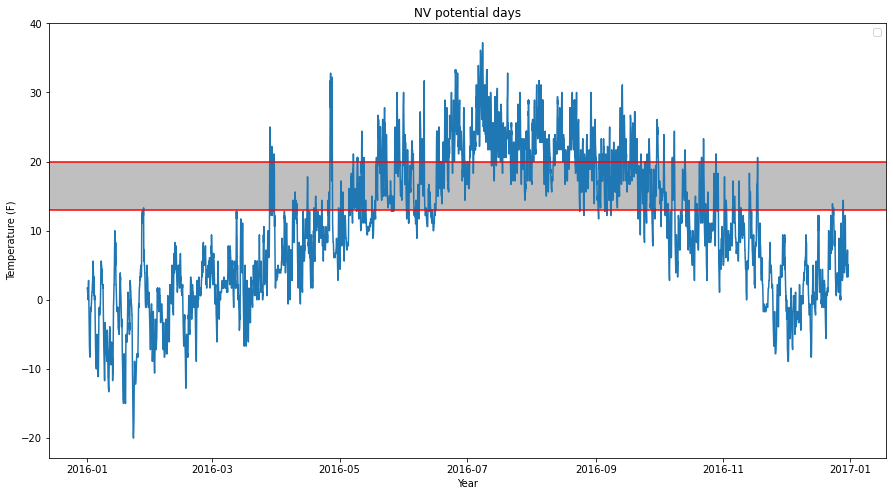

In [10]:
x = NewDf.index
temp = NewDf["DB_temp"]

plt.figure(figsize=(15,8))
myTime = pd.date_range('1/1/2016', periods=8760, freq='H')

plt.plot(myTime,temp)
plt.title('NV potential days')
plt.xlabel('Year')
plt.ylabel('Temperature (F)')
plt.legend(loc='best')

plt.axhline(13, color='r', label=r'True $\beta_1$')
plt.axhline(20, color='r', label=r'True $\beta_1$')
plt.axhspan(13, 20, facecolor='0.5', alpha=0.5,label=r'True $\beta_1$')

plt.show()

In [15]:
energyDF = pd.read_csv('Energy_Boston.csv', sep=",", header=0)

In [17]:
energyDF.tail()

,Date/Time,Cooling,Heating
8755,12/31 20:00:00,0.0,6.70
8756,12/31 21:00:00,0.0,6.97
8757,12/31 22:00:00,0.0,0.00
8758,12/31 23:00:00,0.0,0.98
8759,12/31 24:00:00,0.0,2.15


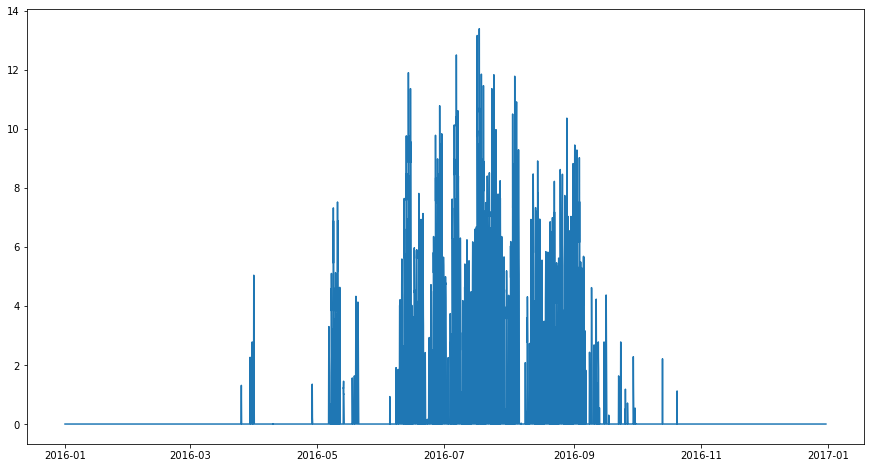

In [20]:
plt.figure(figsize=(15,8))
plt.plot(myTime,energyDF["Cooling"])

In [37]:
## your code here








In [44]:
## your code here





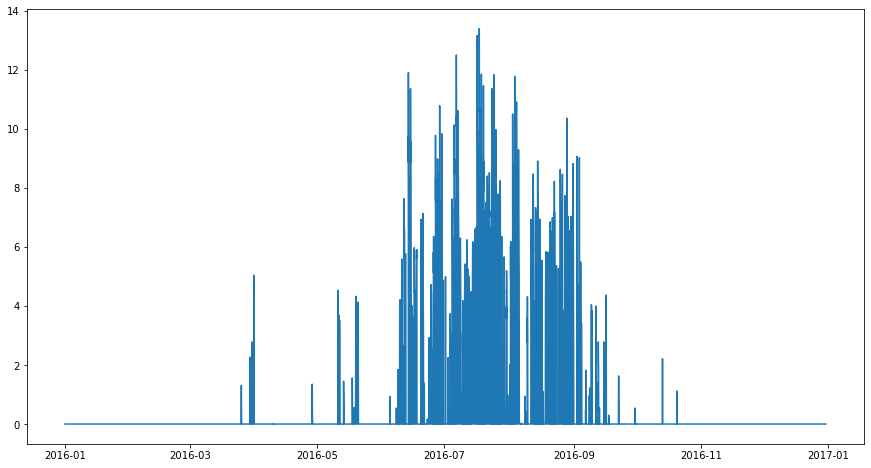

In [40]:
plt.figure(figsize=(15,8))
plt.plot(myTime,energyDF["Cooling_NV"])

In [43]:
energyDF.describe()

,Cooling,Heating,Cooling_NV
count,8760.000000,8760.000000,8760.000000
mean,0.571703,3.368909,0.431562
std,1.769531,5.759228,1.598419
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,4.920000,0.000000
max,13.390000,36.150000,13.390000


## Imputing missing values

In [48]:
df = pd.read_csv('HouseZero_full.csv', sep=",", header=0)
df= df[:4000] 
refer = pd.read_csv('haravrd_hourly.csv', sep=",", header=0)
refer= refer[:4000] 

In [50]:
df.head()

,Temp,WS,WD
0,4.400000,2.600000,178.000000
1,4.400000,2.283333,182.416667
2,6.311000,2.106667,175.783333
3,7.026988,2.037349,185.168675
4,7.938321,1.109489,235.072993


In [53]:
refer.head()

,Temp,Dew,RH,WS,WD
0,3.56,2.70,94.11,2.05,170.92
1,4.76,3.94,94.45,1.97,178.50
2,5.55,4.77,94.69,1.61,159.67
3,6.70,5.97,95.02,1.53,179.67
4,7.72,7.07,95.64,0.21,226.67


<AxesSubplot:>

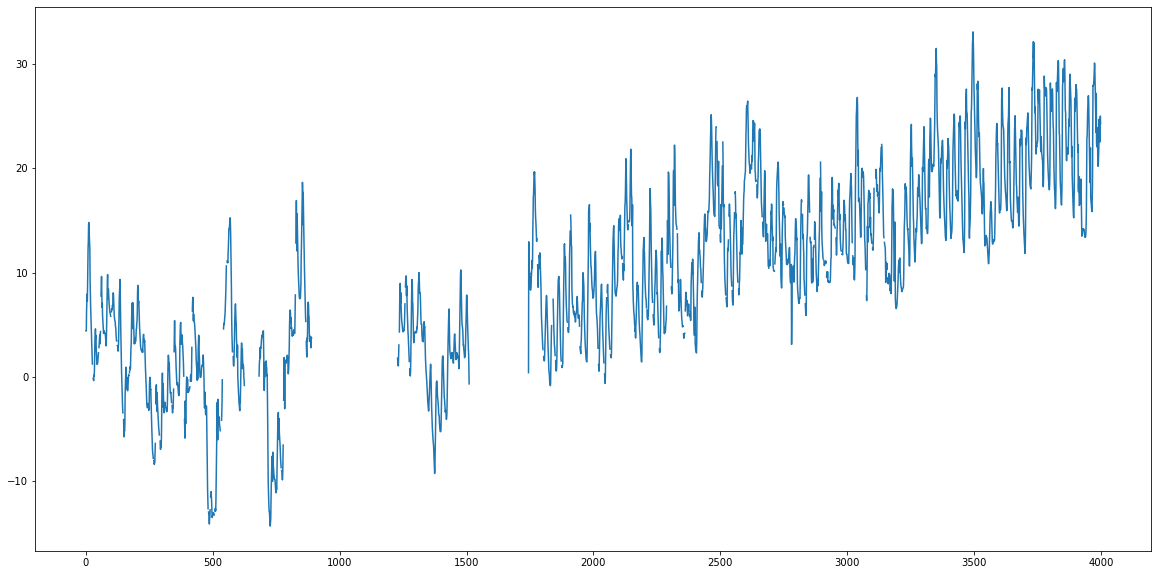

In [49]:
plt.figure(figsize=(20,10))
df["Temp"].plot()

## Imputing mean values

In [57]:
from sklearn.impute import SimpleImputer

## your code here








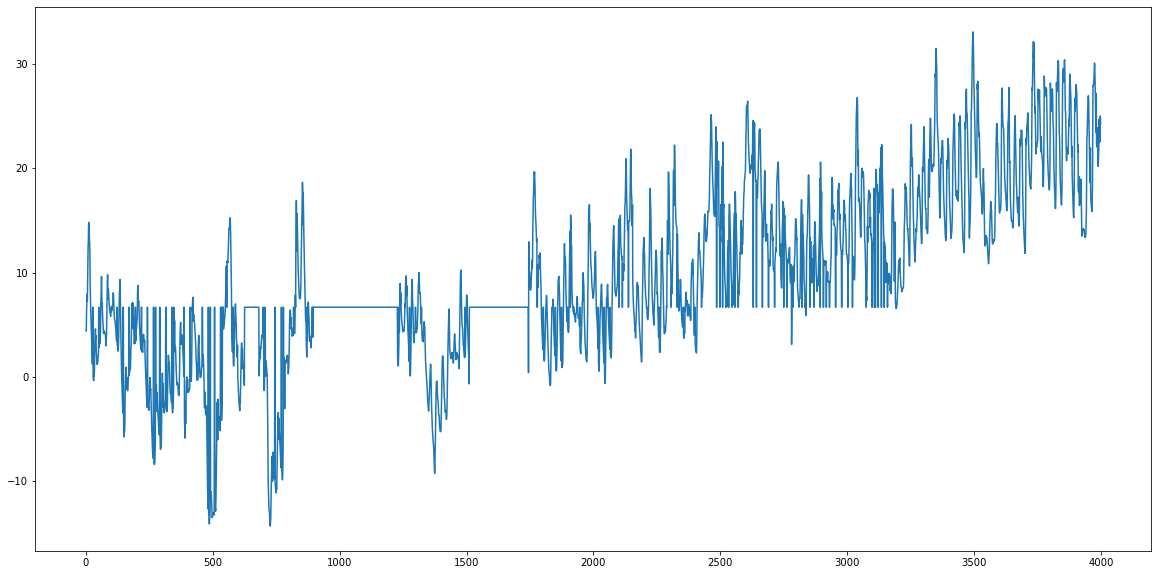

In [52]:
plt.figure(figsize=(20,10))
plt.plot(meanLst.tolist())

## Imputing reference values

In [54]:
## your code here





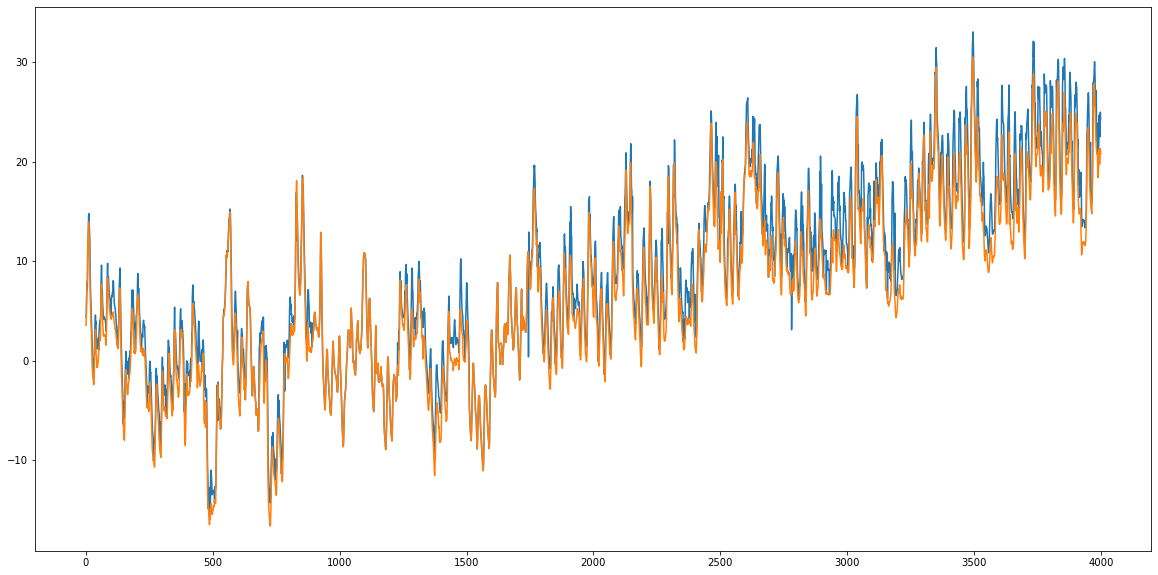

In [56]:
plt.figure(figsize=(20,10))
plt.plot(df["Temp"])
plt.plot(refer["Temp"])